4-split design using separable (non-overlapping) convolutions and zero padding. Kernel-weights are naturally shared, final dense layer of encoder was removed to achieve equivilance with previous 4-split model.Zero-padding makes it hard to test of this model is equivalent to the 4-split model that uses different encoder models.

In [132]:
import sys; sys.path.insert(0, '..')
import dataset
import tensorflow as tf
import matplotlib.pyplot as plt

In [134]:
encoder = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(28,28,1)),
        tf.keras.layers.ZeroPadding2D(padding=(2,2)),
        tf.keras.layers.Conv2D(filters=int(32), kernel_size=(4,4), strides=(4,4), activation='relu', padding='valid', use_bias=True),
        tf.keras.layers.Conv2D(filters=int(64), kernel_size=(2,2), strides=(2,2), activation='relu', padding='valid', use_bias=True),
        tf.keras.layers.Conv2D(filters=1, kernel_size=(1,1), strides=(1,1), activation='sigmoid', padding='valid'),
        tf.keras.layers.Flatten(),
    ]
)
decoder = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(16,)),
        tf.keras.layers.Dense(units=7*7*32, activation='relu'),
        tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
        tf.keras.layers.Conv2DTranspose( filters=64, kernel_size=3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv2DTranspose( filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv2DTranspose( filters=1, kernel_size=3, strides=1, padding='same')
    ]
)

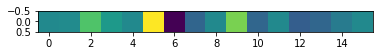

In [136]:
# model = tf.keras.models.Model(inputs=encoder.input, outputs=decoder(encoder.output))
# model.compile(loss='mse', optimizer='adam')
encoder.compile(loss='mse', optimizer='adam')
ans = encoder.predict(dataset.x_train[0].reshape(1,28,28,1))
plt.imshow(ans.reshape(1,16))

In [157]:
encoder_input =  tf.keras.layers.Input(shape=(28,28,1))
x = tf.keras.layers.ZeroPadding2D(padding=(2,2))(encoder_input)
x = tf.keras.layers.Conv2D(filters=int(4), kernel_size=(4,4), strides=(4,4), activation='relu', padding='valid', use_bias=True)(x)
x = tf.keras.layers.Conv2D(filters=int(8), kernel_size=(2,2), strides=(2,2), activation='relu', padding='valid', use_bias=True)(x)
x = tf.keras.layers.Conv2D(filters=1, kernel_size=(1,1), strides=(1,1), activation='sigmoid', padding='valid')(x)
encoder_output = tf.keras.layers.Flatten()(x)

# decoder_input = tf.keras.layers.Input(shape=(16,))
x = tf.keras.layers.Dense(units=7*7*32, activation='relu')(encoder_output)
x = tf.keras.layers.Reshape(target_shape=(7, 7, 32))(x)
x = tf.keras.layers.Conv2DTranspose( filters=64, kernel_size=3, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2DTranspose( filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(x)
decoder_output = tf.keras.layers.Conv2DTranspose( filters=1, kernel_size=3, strides=1, padding='same')(x)

model = tf.keras.models.Model(inputs=encoder_input, outputs=decoder_output)

In [158]:
train_gen = dataset.BatchGenerator(dataset.x_train, 1, 32)
test_gen = dataset.BatchGenerator(dataset.x_test, 1, 32)

In [159]:
model.compile(loss='mse', optimizer='adam')
model.fit(train_gen, validation_data=test_gen, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0414 - val_loss: 0.0313
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0297 - val_loss: 0.0288
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0276 - val_loss: 0.0267
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0265 - val_loss: 0.0261
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0258 - val_loss: 0.0254
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0254 - val_loss: 0.0249
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0250 - val_loss: 0.0244
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0247 - val_loss: 0.0244
Epoch 9/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0244 - val_loss: 0.0240
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.024

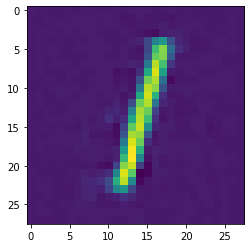

In [83]:
plt.imshow(model.predict(dataset.x_test[2].reshape(1,28,28,1)).reshape(28,28))

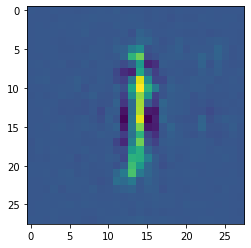

In [85]:
import numpy as np

ans = model.predict(np.zeros((1,28,28,1)))
#plt.imshow(ans.reshape(28,28))

['input_53', 'zero_padding2d_37', 'conv2d_104', 'conv2d_105', 'conv2d_106', 'flatten_30', 'dense_27', 'reshape_29', 'conv2d_transpose_87', 'conv2d_transpose_88', 'conv2d_transpose_89']
input_53 (1, 28, 28, 1) 


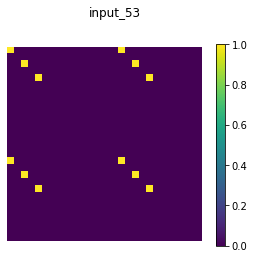

zero_padding2d_37 (1, 32, 32, 1) 


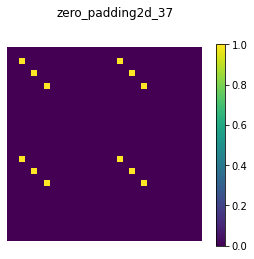

conv2d_104 (1, 8, 8, 4) 


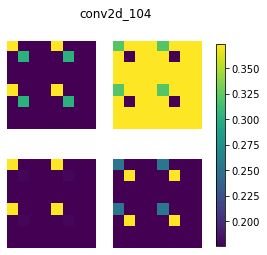

conv2d_105 (1, 4, 4, 8) 


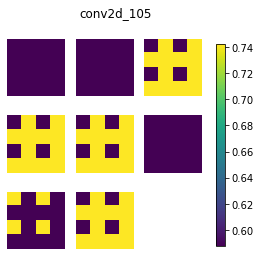

conv2d_106 (1, 4, 4, 1) 


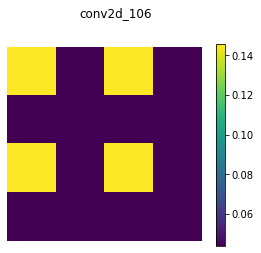

flatten_30 (1, 16) 


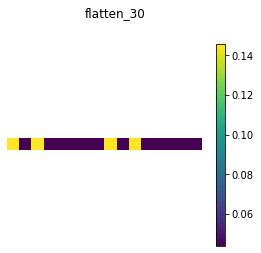

dense_27 (1, 1568) 


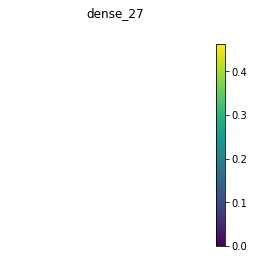

reshape_29 (1, 7, 7, 32) 


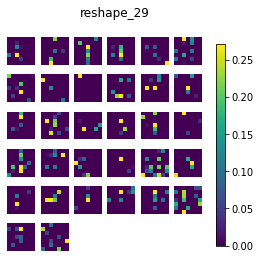

conv2d_transpose_87 (1, 14, 14, 64) 


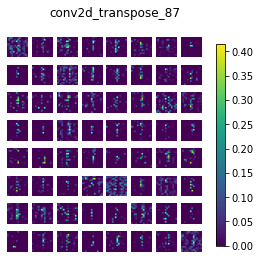

conv2d_transpose_88 (1, 28, 28, 32) 


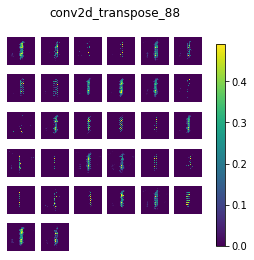

conv2d_transpose_89 (1, 28, 28, 1) 


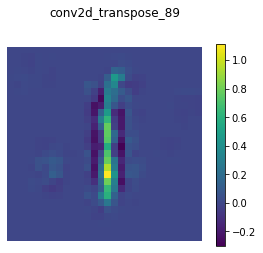

In [161]:
import keract 

print([layer.name for layer in model.layers])
# activation = model.get_layer('conv2d_87')
a_model = tf.keras.models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
ans = a_model.predict(np.ones((1,28,28,1)))

x = np.zeros((1,28,28,1))
for i in range(3):
    x[0][0+2*i][0+2*i][0] = 1
    x[0][0+2*i][16+2*i][0] = 1
    x[0][16+2*i][0+2*i][0] = 1
    x[0][16+2*i][16+2*i][0] = 1

act = keract.get_activations(model, x)
keract.display_activations(act, cmap=None, save=False, fig_size=(4, 4))

# plt.imshow(l.get_weights())
# print(model.get_layer('conv2d_102').get_weights())


# print([a.shape for a in ans])
# plt.imshow(ans[0].reshape(28,28))
# plt.imshow(ans[1].reshape(32,32))
# for i in range(32):
#     plt.imshow(ans[2].T[i].T[0])
# plt.imshow(ans[2][0].reshape(8,8))
# plt.imshow(ans[3][0].reshape(4,4))
#     plt.imshow(a.reshape(-1,-1))